# Customer Segmentation in Python

# Segmentation using K-Means Clustering Algorithm

Suppose that we have a company that deals in various products and you want to understand how well is the performance of the sales of these products.

We have the data that can we analyze, but what kind of analysis that we can do?

Well, we can segment customers based on their buying behaviour on the market.

Keep in mind that the data is really huge, and we can not analyze it by just looking at an overiew of it. We have to use machine learning algorithms to do the job easier for us.

Here we will discuss how to cluster customers on segments based on their behaviour using the K-Means clustering in Python.

# Steps of Analysis

We will perform this analysis in the following steps:

- Gather the data
- Pre-process the data
- Explore the data
- Cluster the data
- Interpret the result

In [17]:
# supress warnings
import warnings
warnings.filterwarnings('ignore')

#Importing Libraries
import numpy as np
import pandas as pd

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import StandardScaler

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [18]:
# Read Data
df = pd.read_excel('online_retail.xlsx')

In [20]:
# Check head of the data
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [13]:
# Data Inspection (Dimension)
df.shape

(406829, 8)

In [21]:
# Number Summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


In [22]:
# Data Structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 24.8+ MB


In [23]:
# Check for Missing Values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

# Data Cleaning (PreProcessing)

In [25]:
df=df[df['CustomerID'].notna()]
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [26]:
# Calculating Total amount by multiplying quantity and unit price
df["Amount"]  = df.Quantity * df.UnitPrice

In [40]:
monetary=df.groupby("CustomerID")['Amount'].sum()
monetary=monetary.reset_index()
monetary.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [41]:
# Calculating the count of orders made by each customer based on customer ID (Frequency)
frequency = df.groupby("CustomerID")['InvoiceNo'].count()
frequency = frequency.reset_index()
frequency.head()

,CustomerID,InvoiceNo
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [42]:
# Finding maximum date in the data
maximum = max(df.InvoiceDate)

# Adding one more day to the max date, so that the max date will have 1 as the difference and not zero.
maximum = maximum + pd.DateOffset(days = 1)
df['diff'] = maximum - df.InvoiceDate
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,374 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,374 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,374 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,374 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,374 days 04:24:00


In [43]:
# Calculating the recency of orders made by each customer based on customer ID (Recency)
recency = df.groupby('CustomerID')['diff'].min()
recency = recency.dt.days.reset_index()
recency.head()

,CustomerID,diff
0,12346.0,326
1,12347.0,2
2,12348.0,75
3,12349.0,19
4,12350.0,310


In [44]:
# Combinining the 3 items together
merge_1 = monetary.merge(frequency, on = "CustomerID", how = "inner")
RFM = merge_1.merge(recency, on = "CustomerID")
RFM.columns = ['CustomerID','Amount','Frequency','Recency']
RFM.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,326
1,12347.0,4310.00,182,2
2,12348.0,1797.24,31,75
3,12349.0,1757.55,73,19
4,12350.0,334.40,17,310


In [45]:
RFM.describe()

,CustomerID,Amount,Frequency,Recency
count,4372.000000,4372.000000,4372.000000,4372.000000
mean,15299.677722,1898.459701,93.053294,92.047118
std,1722.390705,8219.345141,232.471608,100.765435
min,12346.000000,-4287.630000,1.000000,1.000000
25%,13812.750000,293.362500,17.000000,17.000000
50%,15300.500000,648.075000,42.000000,50.000000
75%,16778.250000,1611.725000,102.000000,143.000000
max,18287.000000,279489.020000,7983.000000,374.000000


# Outlier Treatment

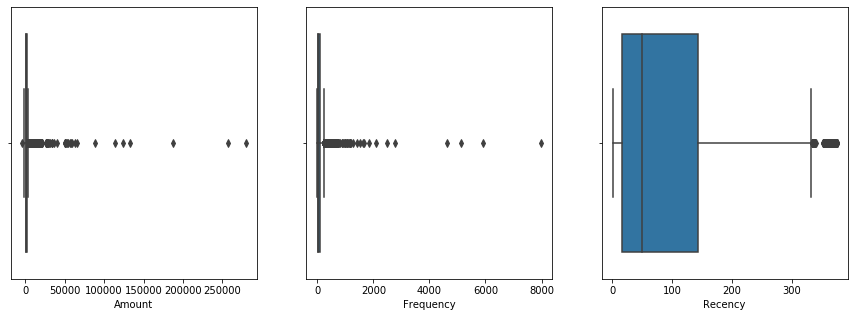

In [46]:
# BoxPlots for all the features to check for outliers
fig, axs = plt.subplots(1,3, figsize = (15,5))

sns.boxplot(RFM['Amount'], ax = axs[0])
sns.boxplot(RFM['Frequency'], ax = axs[1])
sns.boxplot(RFM['Recency'], ax = axs[2])

plt.tight_layout
plt.show()

In [47]:
# Outlier treatment for Amount
Q1 = RFM.Amount.quantile(0.25)
Q3 = RFM.Amount.quantile(0.75)
IQR = Q3 - Q1
RFM = RFM[(RFM.Amount >= Q1 - 1.5*IQR) & (RFM.Amount <= Q3 + 1.5*IQR)]

In [48]:
# Outlier treatment for Frequency
Q1 = RFM.Frequency.quantile(0.25)
Q3 = RFM.Frequency.quantile(0.75)
IQR = Q3 - Q1
RFM = RFM[(RFM.Frequency >= Q1 - 1.5*IQR) & (RFM.Frequency <= Q3 + 1.5*IQR)]

In [49]:
# Outlier treatment for Recency
Q1 = RFM.Recency.quantile(0.25)
Q3 = RFM.Recency.quantile(0.75)
IQR = Q3 - Q1
RFM = RFM[(RFM.Recency >= Q1 - 1.5*IQR) & (RFM.Recency <= Q3 + 1.5*IQR)]

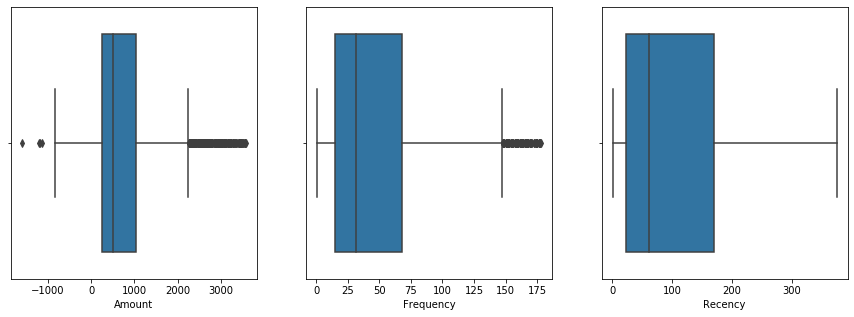

In [50]:
# BoxPlot after Outlier Treatment
fig, axs = plt.subplots(1,3, figsize = (15,5))

sns.boxplot(RFM.Amount, ax = axs[0])
sns.boxplot(RFM.Frequency, ax = axs[1])
sns.boxplot(RFM.Recency, ax = axs[2])

plt.tight_layout
plt.show()

In [52]:
# Scaling the RFM Data

In [59]:
# Standardise all features
customers = RFM.drop("CustomerID", axis=1)

standard_scaler = StandardScaler()
customers = standard_scaler.fit_transform(customers)    ## Structure of the ouput is np.array

In [61]:
customers = pd.DataFrame(customers)
customers.columns = ['Frequency','Amount','Recency']
customers.head()

,Frequency,Amount,Recency
0,-1.041614,-1.070949,2.136422
1,1.385298,-0.375498,-0.282050
2,1.331702,0.631707,-0.821629
3,-0.590055,-0.711233,1.982257
4,1.045238,1.159290,-0.657828


# Modelling
Choose k-number

# Silhouette Analysis

In [63]:
from sklearn.metrics import silhouette_score

ssw = []

for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(customers)
    ssw.append([k, silhouette_score(customers, kmeans.labels_)])

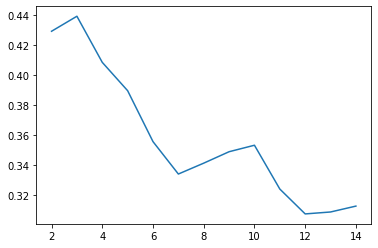

In [64]:
# Plot Silhouette Scores
plt.plot(pd.DataFrame(ssw)[0], pd.DataFrame(ssw)[1]);

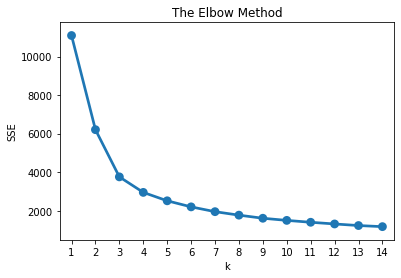

In [65]:
from sklearn.cluster import KMeans

ssw = {}
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customers)
    ssw[k] = kmeans.inertia_  # SSE to closest cluster centroid

plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(ssw.keys()), y=list(ssw.values()))
plt.show()

In [66]:
# KMeans with 3 Clusters
model = KMeans(n_clusters=3, random_state=42)
model.fit(customers)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [67]:
# Add Cuslter information back to the dataset
RFM["Cluster"] = model.labels_
RFM.head()

,CustomerID,Amount,Frequency,Recency,Cluster
0,12346.0,0.00,2,326,1
2,12348.0,1797.24,31,75,2
3,12349.0,1757.55,73,19,0
4,12350.0,334.40,17,310,1
5,12352.0,1545.41,95,36,0


In [70]:
# Check Cluster Profiles
RFM.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'Amount':['mean', 'count']}).round(1)

Recency Frequency  Amount      
           mean      mean    mean count
Cluster                                
0          44.6     109.6  1844.4   788
1         255.7      20.7   327.3   974
2          52.3      34.1   557.9  1935

# Hierarchial Clustering

In [71]:
# Prepare a copy of RFM Data
RFM_H = RFM.drop('Cluster', axis=1)
RFM_H.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,326
2,12348.0,1797.24,31,75
3,12349.0,1757.55,73,19
4,12350.0,334.40,17,310
5,12352.0,1545.41,95,36


In [72]:
# Create the Linkage Method and Labels
from scipy.cluster.hierarchy import dendrogram, linkage
link_method = linkage(customers, method = 'ward')
labelList = np.array(RFM.CustomerID)

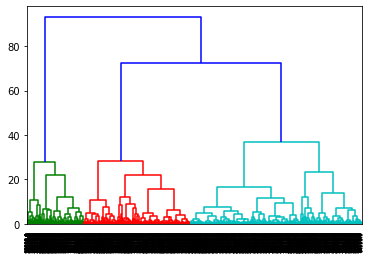

In [73]:
# Visualize Dendrogram
dend = dendrogram(link_method,labels = labelList)

In [74]:
# Create 3 Clusters using Agglomerative Method
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
Clust = cluster.fit_predict(customers)
print(Clust)

[2 0 1 ... 2 0 1]


In [75]:
# Add Clusters back to the data
RFM_H["Clusters"] = Clust
RFM_H.head()

,CustomerID,Amount,Frequency,Recency,Clusters
0,12346.0,0.00,2,326,2
2,12348.0,1797.24,31,75,0
3,12349.0,1757.55,73,19,1
4,12350.0,334.40,17,310,2
5,12352.0,1545.41,95,36,1


In [76]:
RFM_H[RFM_H['Clusters'] == 0].head()

,CustomerID,Amount,Frequency,Recency,Clusters
2,12348.0,1797.24,31,75,0
9,12356.0,2811.43,59,23,0
11,12358.0,1168.06,19,2,0
16,12363.0,552.00,23,110,0
17,12364.0,1313.10,85,8,0


In [77]:
# Check Cluster Profiles (KMeans)
KMeans = RFM.drop('CustomerID', axis = 1).groupby('Cluster').mean()
KMeans['Freq'] = RFM.Cluster.value_counts().sort_index()
KMeans.reset_index().round(1)

,Cluster,Amount,Frequency,Recency,Freq
0,0,1844.4,109.6,44.6,788
1,1,327.3,20.7,255.7,974
2,2,557.9,34.1,52.3,1935
